# Matplotlib Notes

In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Using matplotlib on Python: The simplest graph we can create is on the cartesian plane, where through pyplot, we can plot different values with $y$ values. By default, the $x$ values will start from $0$, and will by default create a line graph created by the $y$ values:

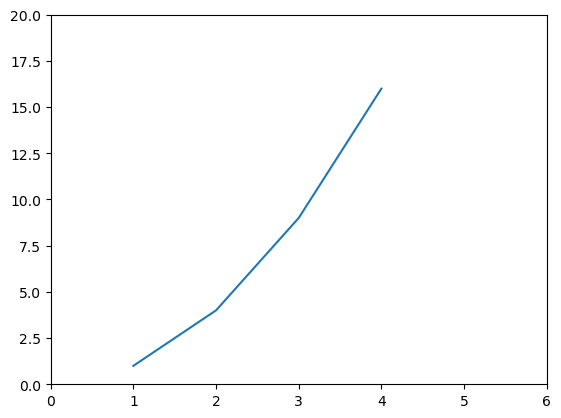

In [80]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.axis([0, 6, 0, 20])
plt.show()

The plot() function takes 2 lists as parameters, the first as x values, and the second as y values, and thus creates points on the graph. We can omit the x values list, where the x values will go to its default. The axis() function takes a list in the form of [xmin, xmax, ymin, ymax]

To use matplotlib more effectively, we should use numpy arrays instead of lists. There are many ways to create different types of numpy arrays using different functionalities

In [81]:
# 1D array
arr = np.array([1, 2, 3, 4, 5])
print(arr, end="\n\n")

# 2D array
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr, end="\n\n")

# Array with all zeros, shape(2, 3)(2 rows, 3 columns)
arr = np.zeros((2, 3), dtype=np.int64)
print(arr, end="\n\n")

# Array with all ones
arr = np.zeros((1, 1), dtype=np.int64)
print(arr, end="\n\n")

# Array with evenly spaced values within a given interval
# In the form arange(start, stop, step)
arr = np.arange(1, 10, 3)
print(arr, end="\n\n")

# Similar to arange(), we can create array with evenly spaced values
# within a given interval in the form linspace(start, stop, num_values)
arr = np.linspace(1, 9, 5, dtype=np.int64)
print(arr)

[1 2 3 4 5]

[[1 2 3]
 [4 5 6]]

[[0 0 0]
 [0 0 0]]

[[0]]

[1 4 7]

[1 3 5 7 9]


Notice that linspace() must include the value stop as the maximum in the array, while arange() does not. Now we can create graphs easily:

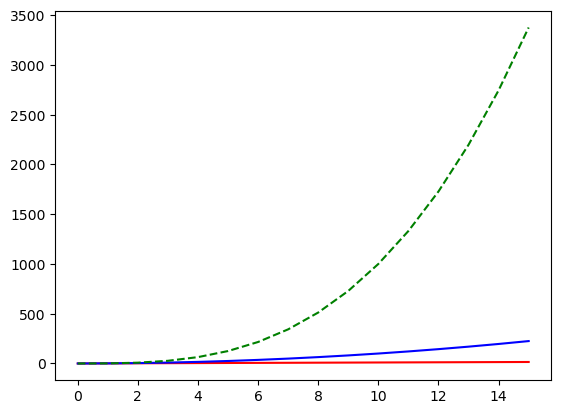

In [82]:
arr = np.arange(0, 16, 1)
plt.plot(arr, arr, 'r', arr, arr**2, 'b', arr, arr**3, 'g--')
plt.show()

We can have multiple lines on a graph. In addition, we can change the color of each graph, add markers to each point on the graph, and change the style of each line. We can also have different types of graphs as well, such as bar graphs and scatter graphs. The axis doesn't have to be numerical - it can also be categorical:

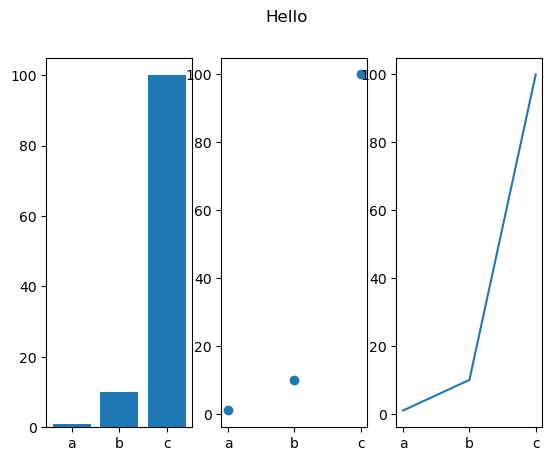

In [83]:
names = ['a', 'b', 'c']
values = [1, 10, 100]
plt.suptitle("Hello")
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.show()

The suptitle() is the title of the entire figure. The function subplot() is the location and the size of the plot on the figure, in the form (nrows, ncolumns, index). nrows means the proportion of the graph in terms of the verticality, ncolumns means the proportion of the graph in terms of the horizontality, and the index is the location of the graph, starting from 1 on the upper left hand side. For example, if ncolumns = 2, then the graph shrinks by a factor of 2, taking up half the original space. Notice that bar(), scatter(), and plot() are functions that specifies the type of graph, and its parameters are the same(x-axis, y-axis).

We can also create multiple different figures to have bigger graphs.


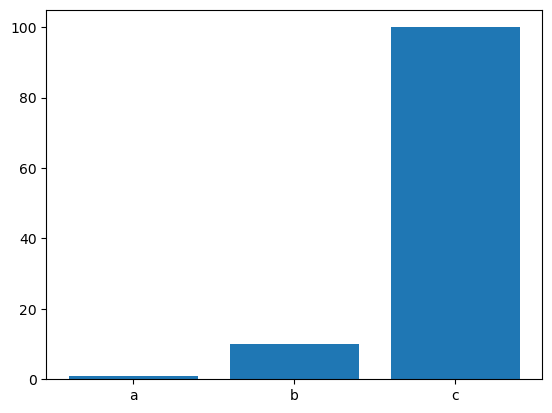

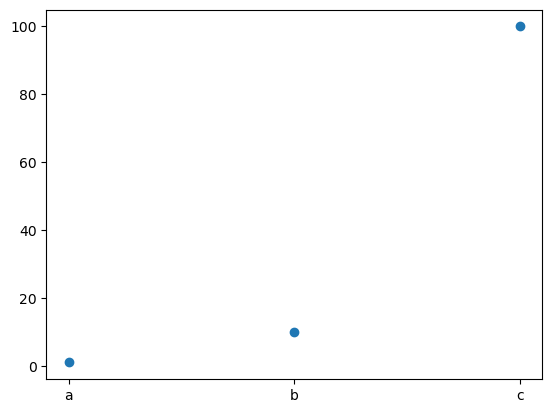

In [84]:
plt.figure(1)
plt.bar(names, values)
plt.figure(2)
plt.scatter(names, values)
plt.show()

A more useful tool is to create function graphs, such as quadratic functions and logarithmic functions, created using numpy. First, we define a function, then we create an array outputed by inputing values from a numpy array into the function, and we then graph the function using matplotlib.

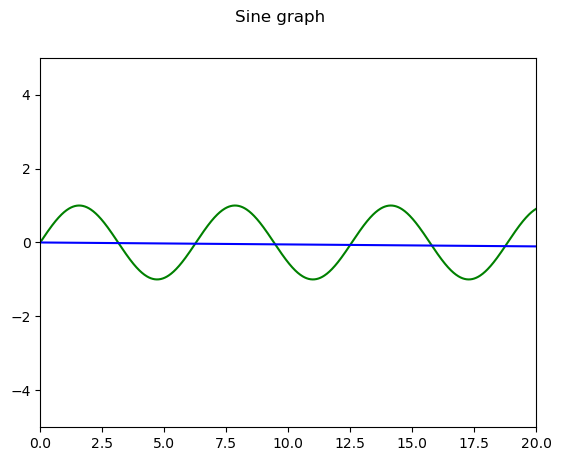

In [85]:
def sin(x):
    return np.sin(x)

x_1 = np.linspace(0, 100, 5000)
x_2 = np.linspace(0, 100, 5)
y_1 = sin(x_1)
y_2 = sin(x_2)

plt.suptitle("Sine graph")
plt.plot(x_1, y_1, 'g')
plt.plot(x_2, y_2, 'b')
plt.axis([0, 20, -5, 5])
plt.show()

Notice how the blue line doesn't look like a proper sine graph. This is because we have only inputed 5 numbers into the sin(x) function, thus matplotlib plots those 5 numbers in a straight line; it cannot detect that the output numbers were part of a sin function. Therefore, to make a more accurate function graph, more values that are close to each other is needed.

We can also add text to our graphs. Here is a histogram that implements the normal distribution corresponding with a mean and variance noted as text in the figure. Note that histogram outputs continuous values, while bar graphs outputs discrete values:

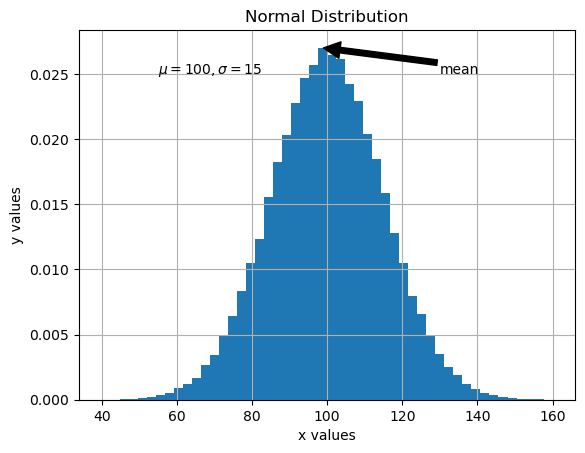

In [86]:
mu, sigma = 100, 15
np.random.seed(0)
x = np.random.normal(mu, sigma, 100000)
plt.hist(x, 50, range=[40, 160], density=True)
plt.grid(True)
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Normal Distribution")
plt.text(55, 0.025, r'$\mu = 100, \sigma = 15$')
plt.annotate('mean', xy=(99, 0.027), xytext=(130, 0.025), arrowprops=dict(facecolor='black'))
plt.show()

The function np.random.seed(0) ensures that the random values we output will be the same when running the function again, to make debugging easier. The function np.random.normal() is the normal distribution, where we input the mean and the variance of the desired normal distribution into the function, as well as the number of values we want to output. The function plt.hist() plots a histogram with the values that we have obtained from the normal distribution, where there are 50 bins on the graph ranging from the x values $x \in [40, 160]$. In addition, the density parameter shows whether or not you want a probability density function. The function plt.text(x, y, text_here) inputs the location of the text(using xy coordinates on the histogram) and the text itself.

Often when we have scatter plots, it is natural to want to plot the line of best fit, or the regression line, to find the correlation between the x and y values. To do this, we use the polyfit() function, that returns the variables m and b, corresponding to the equation of a line $y = mx+b$, where m is the slope and b is the y-intercept of the line. 

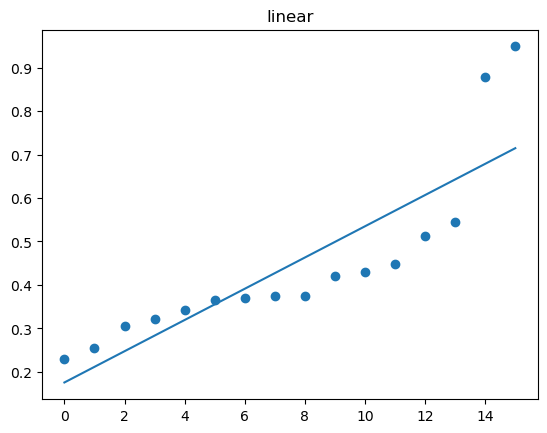

In [87]:
# np.random.seed(1)
y = np.random.normal(0.5, 0.4, 20)
y = y[(y>0) & (y<1)]
y.sort()
x = np.arange(len(y))

plt.scatter(x, y)
plt.yscale("linear")
plt.title("linear")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()